# Titanic Survival Prediction

First of all i will import libraies

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score

Now i read data and load it

In [3]:
df = pd.read_excel("C:/Users/Umer/Documents/Code_Workplace/Pyton/Ai_Project/Datasets/titanic3.xls")
df.sample(20)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
108,1,1,"Fleming, Miss. Margaret",female,NaN,0,0,17421,110.8833,NaN,C,4,NaN,NaN
1147,3,0,"Riihivouri, Miss. Susanna Juhantytar ""Sanni""",female,22.0,0,0,3101295,39.6875,NaN,S,NaN,NaN,NaN
296,1,1,"Thayer, Mrs. John Borland (Marian Longstreth M...",female,39.0,1,1,17421,110.8833,C68,C,4,NaN,"Haverford, PA"
534,2,1,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,NaN,S,11,NaN,"Worcester, England"
957,3,0,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,NaN,S,NaN,NaN,NaN
752,3,0,"Davies, Mr. Alfred J",male,24.0,2,0,A/4 48871,24.1500,NaN,S,NaN,NaN,"West Bromwich, England Pontiac, MI"
379,2,1,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.2500,NaN,S,14,NaN,"Bishopstoke, Hants / Fayette Valley, ID"
370,2,1,"Christy, Miss. Julie Rachel",female,25.0,1,1,237789,30.0000,NaN,S,12,NaN,London
224,1,0,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S,NaN,166.0,"Surbiton Hill, Surrey"
801,3,0,"Flynn, Mr. James",male,NaN,0,0,364851,7.7500,NaN,Q,NaN,NaN,NaN


In [4]:
df.info()
df.describe()

<class 'pandas.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   str    
 3   sex        1309 non-null   str    
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    str    
 10  embarked   1307 non-null   str    
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    str    
dtypes: float64(3), int64(4), object(2), str(5)
memory usage: 143.3+ KB


,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


Now ee the misising values

In [5]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

Separet target and feature 

In [6]:
X =df.drop(['survived','ticket'],axis =1)
Y = df['survived']

I split data to protect from data leakage

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size =0.2,random_state=42)

Becasue age column has missiing values so we need to fill these 

In [ ]:

X_train['Title'] = X_train['name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
X_test['Title'] = X_test['name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
title_age_map = X_train.groupby('Title')['age'].mean().to_dict()
age_fill_values_train = X_train['Title'].map(title_age_map)
age_fill_values_test = X_test['Title'].map(title_age_map)
X_train['age'] = X_train['age'].fillna(age_fill_values_train)
X_test['age'] = X_test['age'].fillna(age_fill_values_test)
overall_mean_age_train = X_train['age'].mean()
X_test['age'] = X_test['age'].fillna(overall_mean_age_train) 
print("X_train:", X_train['age'].isnull().sum())
print("X_test:", X_test['age'].isnull().sum())


X_train: 0
X_test: 0


Also cabin column has missing values but we use this missing information as valuable information

In [9]:

X_train['Has_Cabin'] = np.where(X_train['cabin'].notnull(), 1, 0)
X_test['Has_Cabin'] = np.where(X_test['cabin'].notnull(), 1, 0)
X_train['Has_Cabin'].isnull().sum()
X_test['Has_Cabin'].isnull().sum()
X_train.drop('cabin',axis =1,inplace = True)
X_test.drop('cabin',axis =1,inplace = True)

Now i will fill missing values of embark 

In [10]:

embarked_mode_train = X_train['embarked'].mode()[0]
X_train['embarked'] = X_train['embarked'].fillna(embarked_mode_train)
X_test['embarked'] = X_test['embarked'].fillna(embarked_mode_train)
print("X_train 'embarked' missing:", X_train['embarked'].isnull().sum())
print("X_test 'embarked' missing: ", X_test['embarked'].isnull().sum())


X_train 'embarked' missing: 0
X_test 'embarked' missing:  0


Now fill missing values in body column it is important fr us

In [11]:

X_train['Body_Recovered'] = np.where(X_train['body'].notnull(), 1, 0)
X_train.drop('body', axis=1, inplace=True)
X_test['Body_Recovered'] = np.where(X_test['body'].notnull(), 1, 0)
X_test.drop('body', axis=1, inplace=True)


Now we will focus on boat column

In [12]:

X_train['In_LifeBoat'] = np.where(X_train['boat'].notnull(), 1, 0)
X_train.drop('boat', axis=1, inplace=True)
X_test['In_LifeBoat'] = np.where(X_test['boat'].notnull(), 1, 0)
X_test.drop('boat', axis=1, inplace=True)


Now we need to fill the home destination clumn 

In [13]:

home_dest_mode_train = X_train['home.dest'].mode()[0]
X_train['home.dest'] = X_train['home.dest'].fillna(home_dest_mode_train)
X_test['home.dest'] = X_test['home.dest'].fillna(home_dest_mode_train)
print("X_train 'home.dest' missing:", X_train['home.dest'].isnull().sum())
print("X_test 'home.dest' missing: ", X_test['home.dest'].isnull().sum())


X_train 'home.dest' missing: 0
X_test 'home.dest' missing:  0


Now fare column is only missing values 1 s we need to fill this we can take mean or als0 median

In [14]:

fare_median_train = X_train['fare'].median()
X_train['fare'] = X_train['fare'].fillna(fare_median_train)
X_test['fare'] = X_test['fare'].fillna(fare_median_train)
print("X_train 'fare' missing:", X_train['fare'].isnull().sum())
print("X_test 'fare' missing: ", X_test['fare'].isnull().sum())


X_train 'fare' missing: 0
X_test 'fare' missing:  0


Now becasue we fill all missing values in our data so now we will convert tet data into number 

In [15]:

embarked_encoder = LabelEncoder()
X_train['embarked'] = embarked_encoder.fit_transform(X_train['embarked'])
X_test['embarked'] = embarked_encoder.transform(X_test['embarked'])
sex_encoder = LabelEncoder()
X_train['sex'] = sex_encoder.fit_transform(X_train['sex'])
X_test['sex'] = sex_encoder.transform(X_test['sex'])
title_encoder = LabelEncoder()
title_mode_train = X_train['Title'].mode()[0]
X_train['Title'] = X_train['Title'].fillna(title_mode_train)
X_test['Title'] = X_test['Title'].fillna(title_mode_train)
X_train['Title'] = X_train['Title'].astype(str)
X_test['Title'] = X_test['Title'].astype(str)
X_train['Title'] = title_encoder.fit_transform(X_train['Title'])
X_test['Title'] = X_test['Title'].map(lambda s: 
                                
                                      -1 if s not in title_encoder.classes_ 
                                
                                      
                             
                                      else title_encoder.transform([s])[0])
                                   




So we need to drop name home destination column becasue they are to unique

In [16]:
X_train = X_train.drop(['name',  'home.dest'],axis =1)
X_test = X_test.drop(['name',  'home.dest'],axis =1)

Now we will train the model

In [18]:
desc_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
desc_model.fit(X_train,y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'entropy'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",4
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [19]:
predi_decesion = desc_model.predict(X_test)

In [ ]:
print("The accuracy score of model is",accuracy_score(y_test,predi_decesion)*100)

The accuracy score of model is 97.32824427480917


Now we will see the tree graph

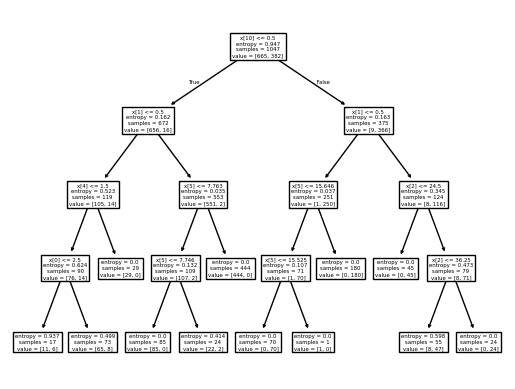

In [23]:
plot_tree(desc_model)
plt.show()